In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import accuracy_score

ds = datasets.load_iris() #loading data 
print(ds.feature_names)
print(ds.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [8]:
data = pd.DataFrame({'sepal length (cm)': ds.data[:,0],
                      'sepal width (cm)': ds.data[:,1],
                      'petal length (cm)': ds.data[:,2],
                       'petal width (cm)': ds.data[:,3],
                        'species': ds.target}
                   )

y = data.species
X= data.drop('species', axis = 1)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


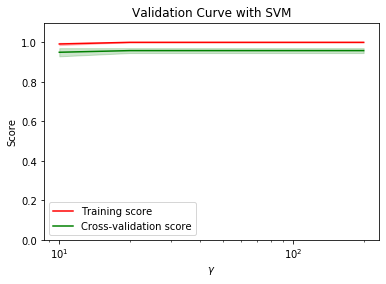

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

param_range = [10, 20, 50, 75, 100, 200]
rf = RandomForestClassifier()
train_score, test_score = validation_curve(
                                rf,
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = param_range, cv = 3)
train_scores_mean = np.mean(train_score, axis=1)
train_scores_std = np.std(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)
test_scores_std = np.std(test_score, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

In [36]:
#according to the validation curve, n_estimators = 100
rf2 = RandomForestClassifier(n_estimators = 100)
rf2.fit(X_train, y_train)
prediction = rf2.predict(X_test)
print("Score 1:",accuracy_score(prediction, y_test))


Score 1: 1.0
